In [1]:
from sympy import *
init_printing()
I_m = symbols("I_m", real=True, finite=True, nonzero=True)
R_m = symbols("R_m", real=True, finite=True, positive=True)
w_f=symbols("\\omega_\%",real=True,finite=True)
V_bat = symbols("V_bat", real=True, finite=True, nonnegative=True)
p = symbols("p", real=True, finite=True, positive=True)
R_sys = symbols("R_sys", real=True, finite=True, positive=True)

# Finding the motor current extrema

Below we will use basic calculus to find the duty cycle $p$ that corresponds to the maximum and minimum (i.e. most negative) motor current. The values of $p$ we find might not be achievable (e.g. outside of the range from -1 to 1), but we ignore that for the purposes of this analysis. We start with our formula for the motor current $I_m$:

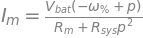

In [2]:
I_m_from_p_w_f=Eq(I_m, V_bat*(-w_f + p)/(R_m + R_sys*p**2))
I_m_from_p_w_f

Find the derivative

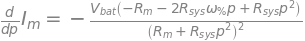

In [3]:
dIm_dp=factor(diff(I_m_from_p_w_f.rhs,p))
display(Eq(diff(I_m,p,evaluate=false), dIm_dp))

Set it equal to zero

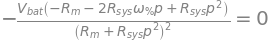

In [4]:
rel16=Eq(dIm_dp,0)
display(rel16)

Multiply both sides by the denominator and divide by $-V_{bat}$ (which are both clearly nonzero) 

In [5]:
rel16=Eq(fraction(rel16.lhs)[0]/(-V_bat),rel16.rhs)
rel16

Solve for $p$ to find the stationary points:

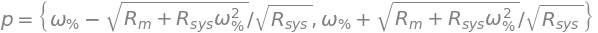

In [6]:
sols = solveset(rel16,p)
display(Eq(p,sols,evaluate=false))

## Proving they are the maximum and minimum the easy way (with logic)

Each of those points could be a minimum, a maximum, or a saddle point. To see that the one less than $\omega_\%$ is a minimum and the one greater than $\omega_\%$ is a maximum, consider the behavior of $I_m$ for $p=\omega_\%$, and as $p$ approaches $+\infty$ and $-\infty$.

At $p=\omega_\%$, $I_m=0$ and is rising (because the derivative is positive), and as $p$ approaches $+\infty$ and $-\infty$, $I_m$ approaches 0 (because the highest power of $p$ in the denominator is more than the highest power of $p$ in the numerator). That means there must be a maximum for some $p>\omega_\%$ and a minimum for some $p<\omega_\%$. Those correspond to the 2 stationary points above.

## Proving they are the maximum and minimum the hard way (with algebra)

Alternatively, we can find the second deriviative $d^2I_m/dp^2$:

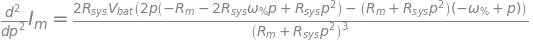

In [7]:
d2Im_dp2=together(diff(dIm_dp,p))
display(Eq(diff(I_m,p,p,evaluate=false),d2Im_dp2))

and evaluate it at each of the stationary points to see if it is negative (indicating a maximum) or positive (indicating a minimum). We can start by simplifying the expression by eliminating things that will not affect its sign. In particular, the denominator and $2R_{sys}V_{bat}$ are both strictly positive, so we can ignore them and focus on this expression:

In [8]:
ex=fraction(d2Im_dp2)[0]/(2*R_sys*V_bat)
display(ex)

Which we can rewrite as a polynomial in p

In [9]:
ex=factor(ex)
display(ex)

Before substitation the stationary points, let's rewrite them in terms of a new variable $x$ defined to the radical parts

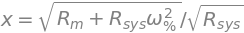

In [10]:
x=symbols("x", real=True, Finite=True)
x_def=Eq(x,sols.args[0].args[1])
display(x_def)

Note that solving for $\omega_\%^2$, gives

In [11]:
w_f2_for_x = solveset(x_def, w_f**2).as_relational(w_f**2)
display(w_f2_for_x)

which will be useful later.

For now, our stationary points become:

In [12]:
sols_w_x = sols.subs(x_def.rhs, x_def.lhs)
display(sols_w_x)

Substituting the stationary point that is above $\omega_\%$

In [13]:
ex0=together(ex.subs(p,sols_w_x.args[0]))
display(ex0)

Expanding and regrouping to get a polynomial

In [14]:
ex0=factor(ex0)
display(ex0)

Substituting our formula for $\omega_\%^2$

In [15]:
ex0=ex0.subs(w_f2_for_x.lhs,w_f2_for_x.rhs)
display(ex0)

Simplifying gives

In [16]:
ex0=factor(ex0)
display(ex0)

Since $\omega_\%$ is nonnegative and $x$, $R_m$, and $R_{sys}$ are all positive, the above expression must be negative. Therefore the stationary point that is above $\omega_\%$ must be a maximum.

In [17]:
ex1=together(ex.subs(p,sols_w_x.args[1]))
display(ex1)

Expanding and regrouping to get a polynomial

In [18]:
ex1=factor(ex1)
display(ex1)

Substituting our formula for $\omega_\%^2$

In [19]:
ex1=ex1.subs(w_f2_for_x.lhs,w_f2_for_x.rhs)
ex1=ex1.subs(w_f**3,w_f*w_f2_for_x.rhs)
display(ex1)

Simplifying gives

In [20]:
ex1=factor(ex1)
display(ex1)

Dividing by $2R_{sys}x^2$ will not affect the sign

In [21]:
ex1=ex1/(2*R_sys*x**2)
display(ex1)

Which is positive if and only if $x>\omega_\%$. If we square both sides of our definition of $x$, we get

In [22]:
x_def2 = Eq(x_def.lhs**2,apart(x_def.rhs**2,R_sys))
display(x_def2)

$\omega_\%^2$ is nonnegative and $R_m$, and $R_{sys}$ are both positive. Therefore $x^2>\omega_\%^2$. Since both $x$ and $\omega_\%$ are nonnegative, that means $x>\omega\%$. Therefore the second derivative of $I_m$ at the stationary point that is below $\omega_\%$ is positive and that point must be a minimum.